In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as  sns
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('nse.csv')


In [81]:
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df.shape

(8470, 1418)

In [83]:
df['Date'] = pd.to_datetime(df['Date'])

In [84]:
df['Date']

0      1991-01-02
1      1991-01-03
2      1991-01-04
3      1991-01-07
4      1991-01-08
          ...    
8465   2024-07-01
8466   2024-07-02
8467   2024-07-03
8468   2024-07-04
8469   2024-07-05
Name: Date, Length: 8470, dtype: datetime64[ns]

In [85]:
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
missing_values = df.isnull().sum()

In [87]:
missing_percentage = (missing_values/len(df))*100

In [88]:
df_cleaned = df.loc[:, missing_percentage<=50]

In [89]:
missing_values

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
DONEAR        4147
CAREERP       5081
INTLCONV      7778
SHREEPUSHK    6297
PRITIKAUTO    7753
Length: 1418, dtype: int64

In [90]:
missing_percentage

Date           0.000000
RELIANCE      15.466352
TCS           35.820543
HDFCBANK      15.430933
ICICIBANK     35.478158
                ...    
DONEAR        48.961039
CAREERP       59.988194
INTLCONV      91.829988
SHREEPUSHK    74.344746
PRITIKAUTO    91.534829
Length: 1418, dtype: float64

In [91]:
df_cleaned

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [92]:
df_cleaned_info = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(611)
memory usage: 39.5 MB


In [93]:
df_cleaned.isnull().sum()

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
GEECEE        4094
REMSONSIND    3003
PTL           4172
ORIENTBELL    4183
DONEAR        4147
Length: 612, dtype: int64

In [94]:
df_filled = df_cleaned.bfill()

In [95]:
df_filled

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [96]:
df_filled.isnull().sum()

Date          0
RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
             ..
GEECEE        0
REMSONSIND    0
PTL           0
ORIENTBELL    0
DONEAR        0
Length: 612, dtype: int64

In [97]:
def identify_outliers_iqr(df, column):
    Q1 = df_filled[column].quantile(0.25)
    Q3 = df_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_filled[(df[column] < lower_bound) | (df_filled[column] > upper_bound)]
    return outliers

# Apply the function to each stock price column
outliers_iqr = {}
for column in df_filled.columns:
    if column != 'Date':
        outliers_iqr[column] = identify_outliers_iqr(df_filled, column)
    

In [98]:
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
df_cleaned = df_filled.clip(lower=lower_bound, upper=upper_bound, axis=1)
df_cleaned_info = df_cleaned.info()
df_cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(40), object(571)
memory usage: 39.5+ MB


In [99]:
df_cleaned.shape

(8470, 612)

In [100]:
basic_stats = df_filled.describe()

In [101]:
first_10_stocks = df_filled.columns[1:11]

In [102]:
df_cleaned_info = df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(611)
memory usage: 39.5 MB


In [103]:
basic_stats

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
count,8470,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,...,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,2007-07-11 12:40:37.969303296,514.448543,798.467475,370.661868,200.478550,237.963422,162.517726,363.667733,114.127340,648.985285,...,795.563177,118.832691,54.664238,76.625256,13.908737,95.317461,14.728617,16.544192,122.100184,130.458937
min,1991-01-02 00:00:00,10.975116,35.474998,2.435000,20.100000,9.350544,13.346102,0.763183,4.182222,61.805000,...,13.650000,7.950000,3.350000,0.500000,2.600000,24.150000,2.020000,3.275000,14.000000,8.900000
25%,1999-02-12 18:00:00,25.584803,39.700001,7.496250,25.127272,15.681876,21.329467,19.350976,14.392500,144.949997,...,314.725006,70.050003,19.822678,12.600000,6.750000,84.300003,5.270000,10.030000,69.550003,31.350000
50%,2007-05-09 12:00:00,298.363907,216.287498,99.955002,113.527271,251.631027,110.849632,197.207817,58.183334,237.464996,...,770.849976,121.370781,19.822678,110.750000,8.650000,93.849998,9.400000,10.030000,69.550003,205.699997
75%,2015-12-06 06:00:00,497.448433,1236.475037,535.462479,256.681824,346.223610,253.587505,496.924988,216.283337,851.274994,...,1304.199951,121.370781,64.520485,110.750000,22.450001,93.849998,9.900000,19.275000,117.000000,214.649994
max,2024-07-05 00:00:00,3177.250000,4219.250000,1768.650024,1233.400024,1475.800049,905.650024,1939.500000,492.149994,2812.449951,...,1375.099976,924.299988,282.798248,283.500000,87.000000,401.250000,214.600006,84.900002,806.200012,236.149994
std,NaN,719.892388,1096.192470,510.729195,249.746445,254.427921,167.137092,457.214896,120.799684,794.411787,...,502.799105,101.980640,56.472196,55.408460,10.745623,41.647104,24.912700,12.051067,124.374667,88.591179


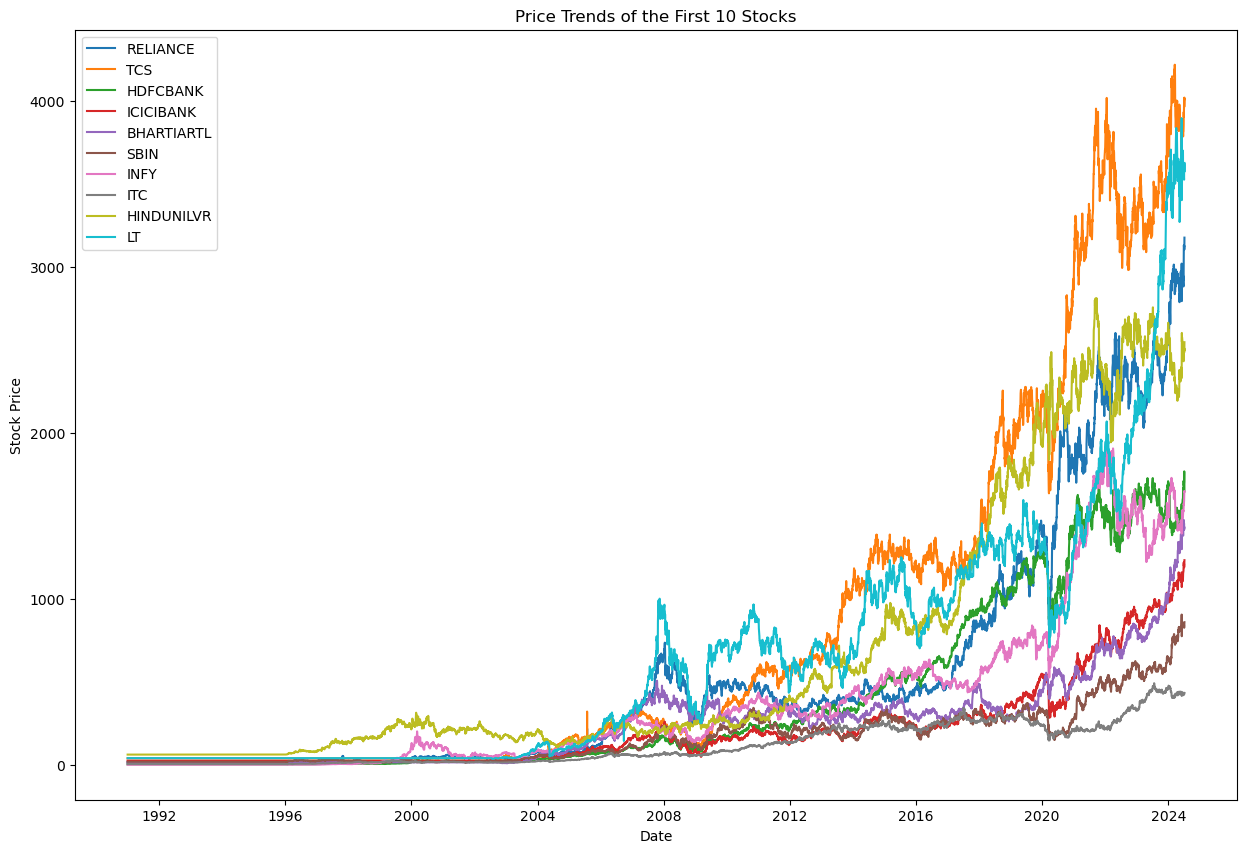

In [104]:
plt.figure(figsize=(15,10))
for stock in first_10_stocks:
    plt.plot(df_filled['Date'],df_filled[stock],label=stock)
    
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.show()
    

# Correlation Analysis

In [105]:
df_filled[first_10_stocks]

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
0,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
2,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
3,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
4,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
...,...,...,...,...,...,...,...,...,...,...
8465,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,3526.550049
8466,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,3626.500000
8467,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,3614.350098
8468,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,3573.300049


In [106]:
returns = df_filled[first_10_stocks].pct_change().dropna()

In [107]:
correlation_matrix = returns.corr()

In [108]:
correlation_matrix

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
RELIANCE,1.000000,0.334207,0.312600,0.323247,0.255303,0.378132,0.243274,0.298100,0.226610,0.214079
TCS,0.334207,1.000000,0.129360,0.198909,0.165686,0.123853,0.208560,0.106972,0.114050,0.121032
HDFCBANK,0.312600,0.129360,1.000000,0.435323,0.246349,0.453585,0.290198,0.319639,0.257731,0.289285
ICICIBANK,0.323247,0.198909,0.435323,1.000000,0.358264,0.522189,0.224409,0.246300,0.215677,0.428387
BHARTIARTL,0.255303,0.165686,0.246349,0.358264,1.000000,0.278240,0.174673,0.186865,0.172131,0.258388
SBIN,0.378132,0.123853,0.453585,0.522189,0.278240,1.000000,0.285193,0.375579,0.276733,0.346659
INFY,0.243274,0.208560,0.290198,0.224409,0.174673,0.285193,1.000000,0.263108,0.219225,0.174273
ITC,0.298100,0.106972,0.319639,0.246300,0.186865,0.375579,0.263108,1.000000,0.332435,0.193286
HINDUNILVR,0.226610,0.114050,0.257731,0.215677,0.172131,0.276733,0.219225,0.332435,1.000000,0.162624
LT,0.214079,0.121032,0.289285,0.428387,0.258388,0.346659,0.174273,0.193286,0.162624,1.000000


In [109]:
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()

In [110]:
most_correlated_pairs = correlation_pairs[correlation_pairs!=1].nlargest(10)

In [111]:
most_correlated_pairs_df=most_correlated_pairs.reset_index()
most_correlated_pairs_df

,level_0,level_1,0
0,SBIN,ICICIBANK,0.522189
1,HDFCBANK,SBIN,0.453585
2,HDFCBANK,ICICIBANK,0.435323
3,LT,ICICIBANK,0.428387
4,RELIANCE,SBIN,0.378132
5,ITC,SBIN,0.375579
6,BHARTIARTL,ICICIBANK,0.358264
7,LT,SBIN,0.346659
8,TCS,RELIANCE,0.334207
9,HINDUNILVR,ITC,0.332435


In [112]:
correlation_matrix.isnull().sum()

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
SBIN          0
INFY          0
ITC           0
HINDUNILVR    0
LT            0
dtype: int64

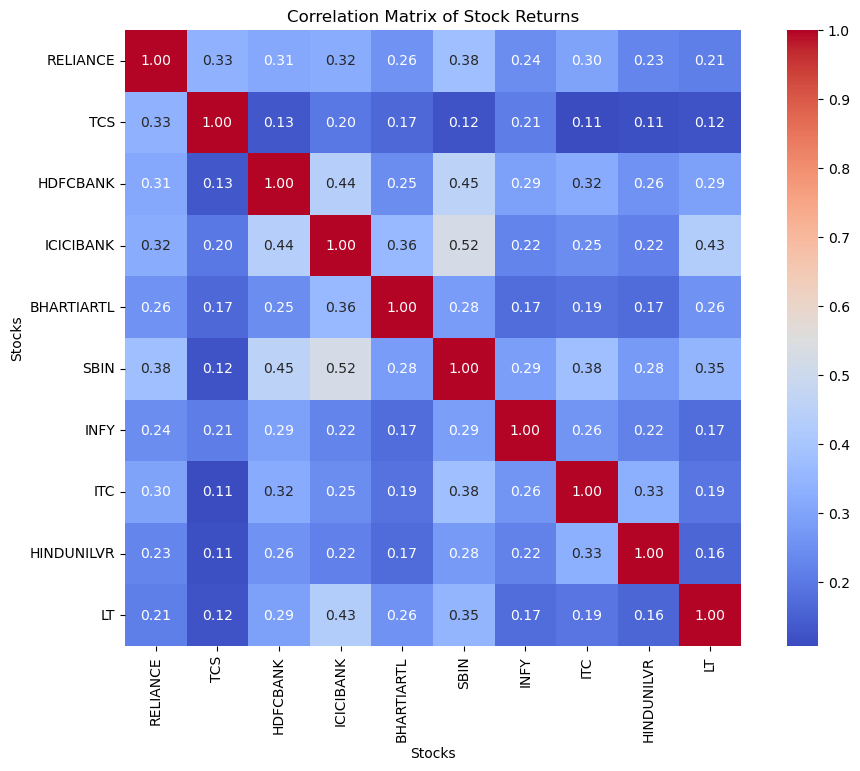

In [113]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix of Stock  Returns')
plt.title('Correlation Matrix of Stock Returns')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

Positive Correlation Insights¶
Stock Movement: Stocks with high positive correlations, like RELIANCE and TCS, generally tend to transport inside the equal path. This may be because of similar industry impacts or financial elements.

Sector Similarity: High nice correlations frequently imply that the organizations are inside the same region or are affected by comparable market situations.

Negative Correlation Insights
Risk Reduction: Stocks with poor correlations, along with RELIANCE and HINDUNILVR, pass in contrary instructions. This can assist in balancing the portfolio and reducing typical threat.

Diversification: Including negatively correlated shares can protect towards market volatility, as profits in you can offset losses in any other.

Diversification Strategies
Asset Variety: Invest in a combination of asset classes (shares, bonds, real estate) to unfold threat. Geographic Spread: Diversify investments across special areas to mitigate local monetary downturns.

Portfolio Optimization
Efficient Frontier: Use gear like mean-variance optimization to discover the nice risk-return balance. Risk Management: Incorporate assets with varying chance levels to healthy your risk tolerance and funding desires

Time Series Decomposition

In [114]:
stock = "TATAMOTORS"

In [115]:
df_filled.set_index('Date', inplace=True)

In [116]:
decomposition=seasonal_decompose(df_filled[stock].dropna(),model='multiplicative',period=365)

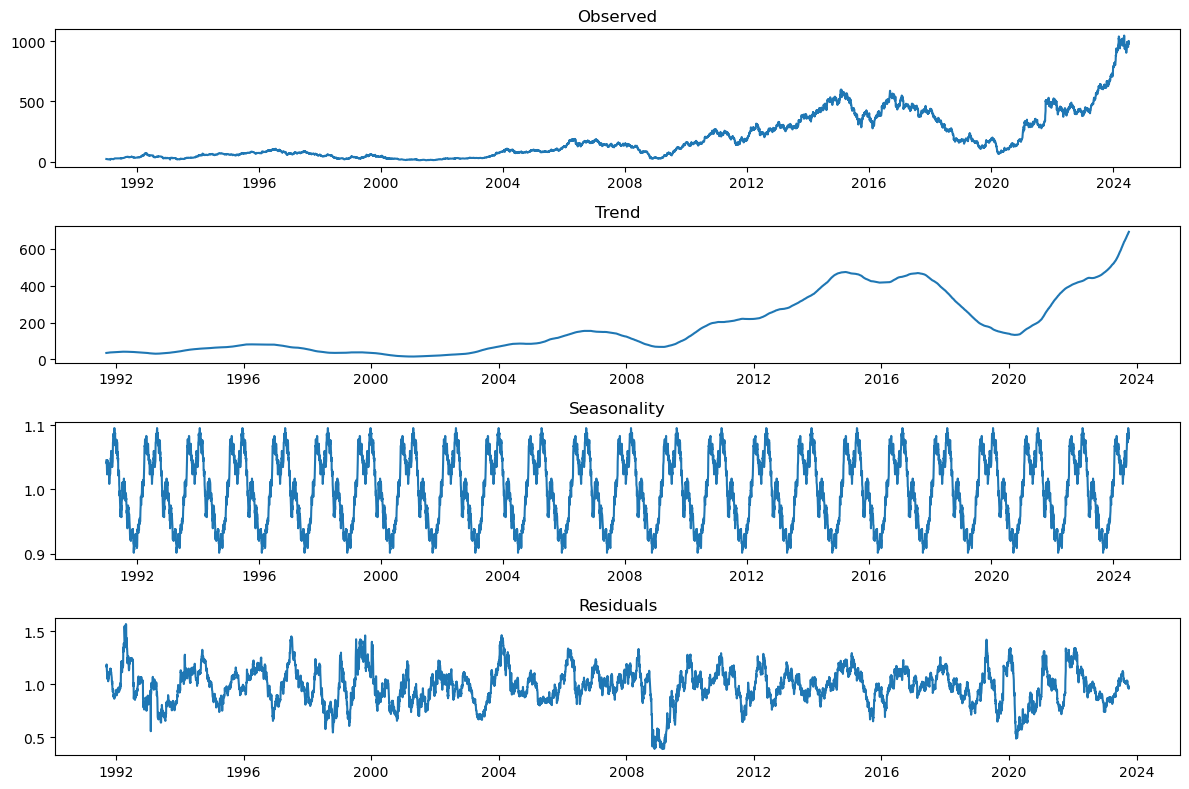

In [117]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Return the decomposed components for further analysis
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



Interpret the results and their implications for trading¶
Interpretation:
Observed: The real statistics suggests an general upward trend from 1992 to beyond 2020.

Trend: A easy upward trajectory, indicating a protracted-term growth in price.

Seasonality: Regular oscillating styles, suggesting predictable cyclical modifications.

Residuals: Random fluctuations round a vital axis, representing noise or irregularities.

Implications for Trading:
Bullish Conditions: The upward trend in both the observed facts and trend component shows a long-time period increase in fee, indicating bullish market situations.

Cyclical Opportunities: The seasonality issue can help pick out cyclical shopping for or promoting possibilities.

Risk Management: Residuals highlight unexpected activities or outliers, which could tell danger control techniques.

# Anomaly Detection
Develop a method to detect anomalous price movements Identify and list the top 5 most significant anomalies in the dataset Investigate and explain possible reasons for these anomalies


In [118]:
df_filled.reset_index(inplace=True)

In [119]:
df_filled

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [120]:
data_10_stocks=df_filled[first_10_stocks]

In [121]:
data_10_stocks.set_index(df_filled['Date'], inplace=True)
data_10_stocks

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
Date,,,,,,,,,,
1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
...,...,...,...,...,...,...,...,...,...,...
2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,3526.550049
2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,3626.500000
2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,3614.350098


In [122]:
def detect_anomalies_bb(df, window=20, std_dev_multiplier=2):
    rolling_mean = df.rolling(window=window).mean()
    rolling_std = df.rolling(window=window).std()
    
    upper_bound = rolling_mean + (std_dev_multiplier * rolling_std)
    lower_bound = rolling_mean + (std_dev_multiplier * rolling_std)
    
    anomalies = pd.DataFrame(index=df.index)
    anomalies['Price'] = df
    anomalies['anomaly'] = (df > upper_bound) | (df < lower_bound)
    anomalies['deviation'] = np.abs(df - rolling_mean)
    return anomalies[anomalies['anomaly']] 

anomalies_by_stock = {}
for col in data_10_stocks.columns:
    anomalies_by_stock[col] = detect_anomalies_bb(data_10_stocks[col])

# Combine anomalies from all stocks into a single DataFrame
all_anomalies = pd.concat(anomalies_by_stock, keys=data_10_stocks.columns, names=['Stock', 'Date'])
top_5_anomalies = all_anomalies.nlargest(5, 'deviation')
top_5_anomalies_df=top_5_anomalies.reset_index()
print(top_5_anomalies_df)
    

        Stock       Date        Price  anomaly   deviation
0          LT 2024-06-03  3897.149902     True  388.149902
1         TCS 2020-03-17  1658.000000     True  366.585010
2         TCS 2020-03-16  1696.400024     True  354.494983
3  HINDUNILVR 2020-04-08  2460.850098     True  352.405103
4          LT 2020-03-23   724.049988     True  351.937509
